# Looking at Similarity in Patent Specifications

Let's have a play with spacy's similarity measures. Are they useful out of the box for patent specifications?

In [6]:
import spacy

nlp = spacy.load('en_core_web_lg', disable=['ner', 'textcat'])

In [5]:
import numpy as np

In [3]:
from patentdata.models.patentcorpus import PatentCorpus

In [4]:
pc = PatentCorpus.load("5_docs")

First let's find the two most similar documents in the set of 5.

In [8]:
n = len(pc.documents)
S = np.zeros((n,n))

spacy_docs = [nlp(doc.text) for doc in pc.documents]
for i, doc in enumerate(spacy_docs):
    for j, other_doc in enumerate(spacy_docs):
        S[i,j] = doc.similarity(other_doc) 
print(S)

[[ 1.00000013  0.97746836  0.95854256  0.97181293  0.97473393]
 [ 0.97746836  1.00000008  0.97913368  0.98654269  0.97632301]
 [ 0.95854256  0.97913368  0.99999992  0.96647961  0.96769926]
 [ 0.97181293  0.98654269  0.96647961  0.99999998  0.96820101]
 [ 0.97473393  0.97632301  0.96769926  0.96820101  1.        ]]


```
[[ 1.00000013  0.97746836  0.95854256  0.97181293  0.97473393]
 [ 0.97746836  1.00000008  0.97913368  0.98654269  0.97632301]
 [ 0.95854256  0.97913368  0.99999992  0.96647961  0.96769926]
 [ 0.97181293  0.98654269  0.96647961  0.99999998  0.96820101]
 [ 0.97473393  0.97632301  0.96769926  0.96820101  1.        ]]
``` 

Interesting that Spacy rangs patent documents as being similar to each other. Out of the box document similarity doesn't seem that useful.  

Let's try at the description paragraph level.

In [10]:
m1 = pc.documents[0].description.paragraph_count
m2 = pc.documents[1].description.paragraph_count
S_p = np.zeros((m1,m2))

for i, para in enumerate(pc.documents[0].description.paragraphs):
    for j, other_para in enumerate(pc.documents[1].description.paragraphs):
        S_p[i,j] = para.doc.similarity(other_para.doc) 
print(S_p)

[[ 0.95347865  0.7951312   0.92834752 ...,  0.90409538  0.788626
   0.88095094]
 [ 0.74776847  0.88629572  0.70323738 ...,  0.78667315  0.78800497
   0.79490456]
 [ 0.58938466  0.71723214  0.52618963 ...,  0.56478772  0.52650814
   0.56003978]
 ..., 
 [ 0.94576051  0.81467172  0.8995508  ...,  0.87571538  0.77042149
   0.85924123]
 [ 0.94227359  0.84491674  0.90962814 ...,  0.92549902  0.82944515
   0.91615646]
 [ 0.78425841  0.65536071  0.67449408 ...,  0.6633652   0.58852536
   0.6726637 ]]


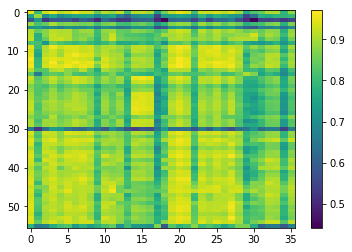

In [13]:
import matplotlib.pyplot as plt

%matplotlib inline

S_p_plot = plt.imshow(S_p,  aspect='auto')
plt.colorbar()

In [14]:
pc.documents[0].description.paragraphs[30]

31 Similar reference characters denote corresponding features consistently throughout the attached drawings.

In [19]:
S_p[0,:]

array([ 0.95347865,  0.7951312 ,  0.92834752,  0.95796073,  0.91398517,
        0.92519323,  0.95765563,  0.9296651 ,  0.923328  ,  0.84334182,
        0.91343425,  0.89074789,  0.91792201,  0.80384267,  0.91262803,
        0.9155203 ,  0.89817826,  0.73907774,  0.85721519,  0.92143029,
        0.95363354,  0.9361785 ,  0.80893091,  0.92525747,  0.92155574,
        0.93732874,  0.91354757,  0.93687673,  0.89201945,  0.76949841,
        0.82359348,  0.84462818,  0.90304016,  0.90409538,  0.788626  ,
        0.88095094])

In [18]:
# Find most similar paragraph to paragraph 1 of first doc
np.argmax(S_p[0,:])

3

In [15]:
pc.documents[0].description.paragraphs[0]

1 The system for delivery of goods ordered via the Internet utilizes a delivery box having a front door with an electronic lock and electronic key reader for receipt of goods ordered via the Internet. Goods are shipped in a transport box having an interior space and a device for controlling the temperature within the interior space. The delivery box has at least one interior transport box receptacle where a transport box containing goods is placed on delivery. A power and data interface is established between a delivery box control circuit and a transport box control circuit. The transport box is placed into one of the receptacles, so that the delivery box control circuit can power the transport box control circuit and environment-controlling device. A security code is downloaded from an Internet merchant site to the delivery box and stored onto a keycard when an order is placed.

In [20]:
pc.documents[1].description.paragraphs[3]

4 Skimming is commonly defined as the theft of credit or debit card information used in an otherwise legitimate transaction. For example, thieves may skim card numbers by installing credit card readers and/or false keyboards and cameras in an ATM machine. The theft occurs when an unsuspecting user inserts a credit or debit card into the compromised reader, which copies the information on the card. The user then enters their personal identification number (PIN) on the ATM keypad. The PIN is captured by camera, or for ATMs with out touch screens, by an overlay device installed over or in the ATM keypad. Using a magnetic card writer, a commonly available device, the thieves duplicate the information from the card's magnetic stripe onto a dummy card. They then use the dummy card and stolen PIN in an ATM machine (or other point-of-sale device) to empty the user's bank account or make illegal purchases. Skimmers have targeted many ATMs, even some installed inside bank premises.

In [24]:
print([(para.number, para.text) for para in pc.documents[0].description.paragraphs])

[(1, 'The system for delivery of goods ordered via the Internet utilizes a delivery box having a front door with an electronic lock and electronic key reader for receipt of goods ordered via the Internet. Goods are shipped in a transport box having an interior space and a device for controlling the temperature within the interior space. The delivery box has at least one interior transport box receptacle where a transport box containing goods is placed on delivery. A power and data interface is established between a delivery box control circuit and a transport box control circuit. The transport box is placed into one of the receptacles, so that the delivery box control circuit can power the transport box control circuit and environment-controlling device. A security code is downloaded from an Internet merchant site to the delivery box and stored onto a keycard when an order is placed.'), (2, 'This application is a continuation-in-part of U.S. patent application Ser. No. 12/379,771, file

In [37]:
print([(para.number, para.text) for para in pc.documents[1].description.paragraphs])

[(1, 'Systems and methods are provided to prevent unauthorized credit and debit transactions. A system creates a transactional, or one-time-use PIN in response to a request from a mobile device, such as a smartphone or tablet computer, belonging to an authorized user. This PIN is securely transmitted to the mobile device, and used in combination with a credit or debit account number to complete the transaction. The user is determined to be authorized by the fact that they are able to access an application on the mobile device that sends the request. The application itself may be protected using a non-changing PIN.'), (2, 'This application claims the benefit of U.S. Provisional Application No. 61/453,911, filed Mar. 17, 2011, the contents of which are incorporated herein by reference in their entirety.'), (3, 'The present invention relates to preventing identity theft, and more particularly to the use of a mobile device and a one-time PIN to prevent harm arising from credit and debit ca

In [32]:
pc.documents[0].description.paragraphs[1]

2 This application is a continuation-in-part of U.S. patent application Ser. No. 12/379,771, filed Feb. 27, 2009.

In [35]:
# Find most similar paragraph to Field of the Invention
np.argmax(S_p[1,:])

1

In [29]:
pc.documents[1].description.paragraphs[1]

2 This application claims the benefit of U.S. Provisional Application No. 61/453,911, filed Mar. 17, 2011, the contents of which are incorporated herein by reference in their entirety.

In [36]:
S_p[1,:]

array([ 0.74776847,  0.88629572,  0.70323738,  0.76676063,  0.69437982,
        0.72832155,  0.75368359,  0.7466512 ,  0.75794049,  0.69289067,
        0.72900781,  0.75448657,  0.66215529,  0.60996619,  0.69331866,
        0.72260064,  0.71951869,  0.55083277,  0.73168903,  0.73781347,
        0.75033182,  0.74206596,  0.69047225,  0.78725084,  0.72311798,
        0.77391017,  0.75418227,  0.73138835,  0.7147853 ,  0.55376896,
        0.63426384,  0.7730012 ,  0.76644567,  0.78667315,  0.78800497,
        0.79490456])

Interestingly it is not just the absolute value but the value that is the greatest distance from the other values.

In [38]:
pc.documents[0].description.paragraphs[3]

4 The present invention relates to the delivery of goods purchased via Internet-based electronic commerce and, more particularly, to a system for delivery of goods ordered via the Internet.

In [41]:
S_p[3,:]

array([ 0.8914482 ,  0.81798556,  0.84441696,  0.90546603,  0.86396349,
        0.87340001,  0.86585166,  0.85721108,  0.86886702,  0.81281438,
        0.85754827,  0.86945953,  0.81095368,  0.80686504,  0.84175934,
        0.85475563,  0.82657649,  0.73451654,  0.78917576,  0.87024859,
        0.88967328,  0.88413781,  0.80480393,  0.89520163,  0.85434212,
        0.88795892,  0.84312557,  0.87616677,  0.84906303,  0.77306952,
        0.79867148,  0.81677017,  0.85974725,  0.87380703,  0.78085646,
        0.86910604])

In [40]:
pc.documents[1].description.paragraphs[3]

4 Skimming is commonly defined as the theft of credit or debit card information used in an otherwise legitimate transaction. For example, thieves may skim card numbers by installing credit card readers and/or false keyboards and cameras in an ATM machine. The theft occurs when an unsuspecting user inserts a credit or debit card into the compromised reader, which copies the information on the card. The user then enters their personal identification number (PIN) on the ATM keypad. The PIN is captured by camera, or for ATMs with out touch screens, by an overlay device installed over or in the ATM keypad. Using a magnetic card writer, a commonly available device, the thieves duplicate the information from the card's magnetic stripe onto a dummy card. They then use the dummy card and stolen PIN in an ATM machine (or other point-of-sale device) to empty the user's bank account or make illegal purchases. Skimmers have targeted many ATMs, even some installed inside bank premises.

## Does similarity reflect patent semantic similarity?

For example, in document 0:  
(17, 'These and other features of the present invention will become readily apparent upon further review of the following specification and drawings.')

Is equivalent to paragraph:  
(14, 'The foregoing features will be more readily understood by reference to the following detailed description, taken with reference to the accompanying drawings, in which:')

In [42]:
# We would hope to see a large similarity at 16, 13
S_p[16, 13]

0.82037541544284964

In [43]:
S_p[16, :]

array([ 0.83778582,  0.66244955,  0.8208243 ,  0.84094102,  0.83010475,
        0.87382339,  0.81772321,  0.80888528,  0.82824484,  0.79634155,
        0.83343631,  0.86587804,  0.80418637,  0.82037542,  0.80283589,
        0.79080316,  0.77668411,  0.80741266,  0.7863057 ,  0.84145289,
        0.85251969,  0.82422934,  0.81595551,  0.82928889,  0.84696563,
        0.86131936,  0.80405607,  0.81239481,  0.84721631,  0.90549312,
        0.86732182,  0.75073578,  0.7950976 ,  0.76849127,  0.68879326,
        0.78015582])

In [44]:
np.argmax(S_p[16, :])

29

In [45]:
S_p[16, 29]

0.90549311521613307

In [46]:
pc.documents[1].description.paragraphs[29]

30 The embodiments of the invention described above are intended to be merely exemplary; numerous variations and modifications will be apparent to those skilled in the art. All such variations and modifications are intended to be within the scope of the present invention as defined in any appended claims.

In [47]:
S_p.shape

(56, 36)

In [48]:
# Let's print each paragraph from doc 0 with it's closest matching paragraph from doc 1
for i, para in enumerate(pc.documents[0].description.paragraphs):
    print(para, "\n")
    print(pc.documents[1].description.paragraphs[np.argmax(S_p[i, :])]) 
    print("----")

1 The system for delivery of goods ordered via the Internet utilizes a delivery box having a front door with an electronic lock and electronic key reader for receipt of goods ordered via the Internet. Goods are shipped in a transport box having an interior space and a device for controlling the temperature within the interior space. The delivery box has at least one interior transport box receptacle where a transport box containing goods is placed on delivery. A power and data interface is established between a delivery box control circuit and a transport box control circuit. The transport box is placed into one of the receptacles, so that the delivery box control circuit can power the transport box control circuit and environment-controlling device. A security code is downloaded from an Internet merchant site to the delivery box and stored onto a keycard when an order is placed. 

4 Skimming is commonly defined as the theft of credit or debit card information used in an otherwise legi

### Observations 

* For big blocks of text it is difficult to see any semantic similarity.  
* The similarity measure does those begin to work for the description of the Figures.
* The paragraph similarity has little use out of the box?


1 A method of identifying a traced media playback decoder embedded in a device, wherein data representative of a trace message is included in the content field of a media content file and a trigger string (16) is included in the user data field of the file. The file is input to the decoder, and a traced decoder is arranged and configured to render the trace message in a desired format in response to detection of the trigger string. If the decoder is not the traced decoder, the trigger string will be disregarded and the component will try and process the media content file like a normal media content file, which results in an error. 

34 Accordingly, the user 125 can utilize the point-of-transaction device 105 to establish a wide variety of security rules to be applied to differing transactions. As one example, the user can select applicable transaction parameters to establish a security rule where an image of the customer is captured for every cash-based transaction, regardless of the 

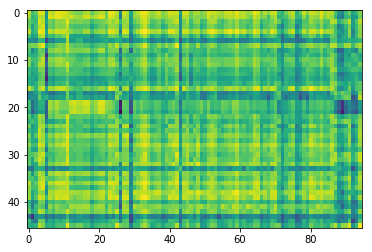

In [51]:
# Let's quickly try on two more documents
m1 = pc.documents[2].description.paragraph_count
m2 = pc.documents[3].description.paragraph_count
S_p = np.zeros((m1,m2))

for i, para in enumerate(pc.documents[2].description.paragraphs):
    for j, other_para in enumerate(pc.documents[3].description.paragraphs):
        S_p[i,j] = para.doc.similarity(other_para.doc) 

S_p_plot = plt.imshow(S_p,  aspect='auto')
# Let's print each paragraph from doc 0 with it's closest matching paragraph from doc 1
for i, para in enumerate(pc.documents[2].description.paragraphs):
    print(para, "\n")
    print(pc.documents[3].description.paragraphs[np.argmax(S_p[i, :])]) 
    print("----")